# Gender : 성별
# Age : 나이
# Smoking : 흡연 여부
# Cigarettes per day : 하루 평균 담배 개비 수
# Blood pressure medication : 혈압약 복용 여부
# Previous stroke : 이전 뇌졸중 여부
# Hypertension : 고혈압 여부
# Diabetes : 당뇨 여부
# Total cholesterol : 총 콜레스테롤 수치
# Systolic blood pressure : 수축기 혈압
# Diastolic blood pressure : 이완기 혈압
# Body Mass Index : 체질량 지수
# Heart rate : 심박수
# Fasting blood sugar : 포도당 수치
# 10-year risk of coronary heart disease : 심근 경색 10년 발병 위험 여부 (1: 발병, 0: 발병하지 않음)

In [1]:

# 구글 드라이브 연동
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 데이터 읽고 상위 5개 데이터 형태 살펴보기
df = pd.read_csv("/content/drive/MyDrive/kaggle/heart-disease/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# 데이터 크기 보기
df.shape

(4238, 16)

In [4]:
#학습 목적으로 범주화 해둔 column 날리기
df.drop("education",axis=1,inplace=True)
df.head(2)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [5]:
#결측치 확인하기
df.isnull().sum()

# 추후 결측치 제거 필요

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

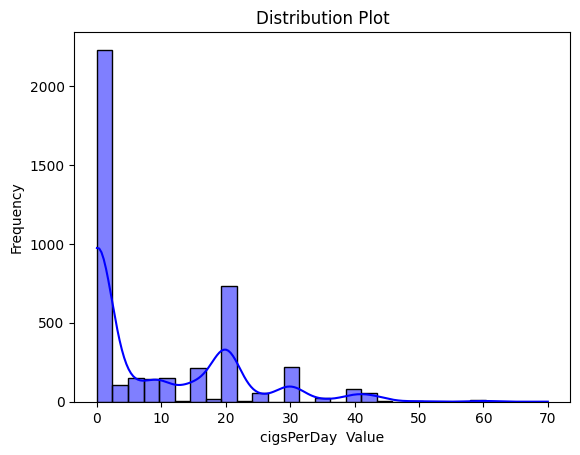

In [6]:
# 결측치 처리 방식을 결정하기 위한 정보
# 하루 평균 담배 개비 수 도수 그래프
import seaborn as sns
import matplotlib.pyplot as plt

data = df.cigsPerDay
sns.histplot(data, kde=True, color='blue')
plt.xlabel('cigsPerDay  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()

In [7]:
# 하루 평균 담배 개비 수 중간값
median_value_cigsPerDay = df['cigsPerDay'].median()

print("Median:", median_value_cigsPerDay)

Median: 0.0


In [8]:
# 데이터 셋이 대부분 0이여서 결측치를 0으로 채운다.
df['cigsPerDay'].fillna(median_value_cigsPerDay , inplace=True)

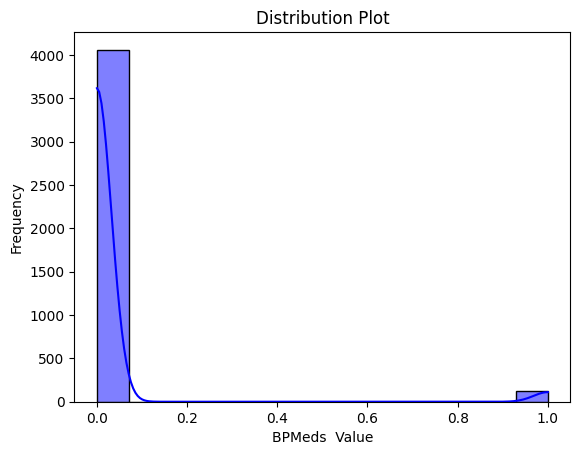

In [9]:
# 결측치 처리 방식을 결정하기 위한 정보
# 혈압약 복용여부 도수 그래프
data = df.BPMeds

sns.histplot(data, kde=True, color='blue')

plt.xlabel('BPMeds  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()

In [10]:
# 값이 0 , 1 인 명목형자료
# 0인 값이 대부분이므로 결측치를 0으로 채운다.
df["BPMeds"].fillna(0,inplace=True)

In [11]:
# 중간 점검
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

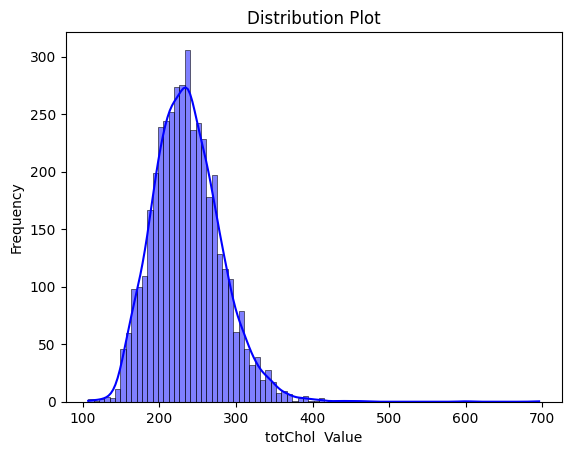

In [12]:
# 결측치 처리 방식을 결정하기 위한 정보
# 총 콜레스테롤 수치
data = df.totChol

sns.histplot(data, kde=True, color='blue')

plt.xlabel('totChol  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()

In [13]:
# 종 모양의 분포를 가짐
# 평균 구해보기
mean_value = df['totChol'].mean()

print("Mean:", mean_value)

Mean: 236.72158548233045


In [14]:
# 평균값을 가정하고 결측치를 채움
df["totChol"].fillna(mean_value,inplace=True)

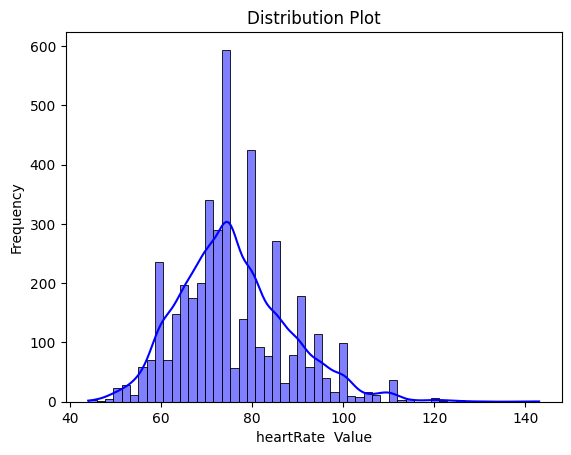

In [15]:
# 결측치 처리 방식을 결정하기 위한 정보
# 심박수
data = df.heartRate

sns.histplot(data, kde=True, color='blue')

plt.xlabel('heartRate  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()

In [16]:
# 평균 구해보기
mean_value = df['heartRate'].mean()
print("Mean:", mean_value)

Mean: 75.87892376681614


In [17]:
# 평균값을 가정하고 결측치를 채움
df["heartRate"].fillna(mean_value,inplace=True)

In [18]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

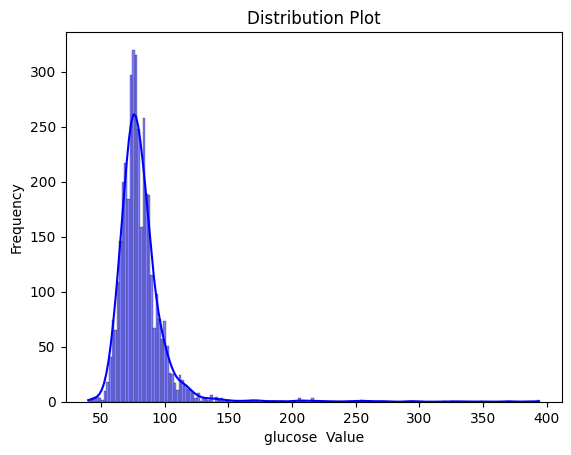

In [19]:
# 결측치 처리 방식을 결정하기 위한 정보
# 혈당 수치
data = df.glucose

sns.histplot(data, kde=True, color='blue')

plt.xlabel('glucose  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()

# 결측치가 있는 행이 388개라 너무 많음. 모두 평균으로 스케일링 하기에는 영향이 너무 큼
# 평균을 가정하지 않고 추후 결측치가 있는 행 제거

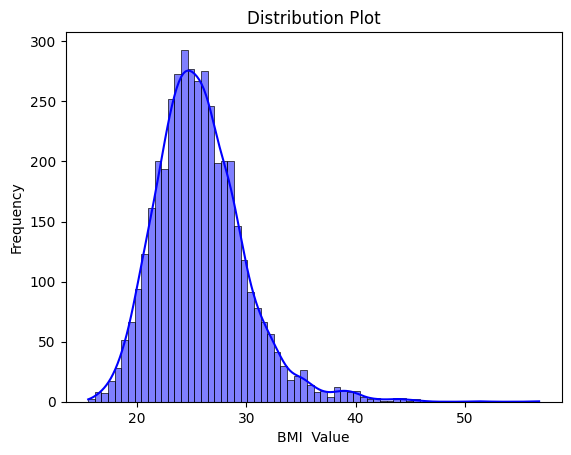

In [20]:
# 결측치 처리 방식을 결정하기 위한 정보
# 체질량 지수
data = df.BMI

sns.histplot(data, kde=True, color='blue')

plt.xlabel('BMI  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()


In [21]:
# 종 모양의 분포를 가짐
# 평균 구해보기
mean_value = df['BMI'].mean()
print("Mean:", mean_value)

Mean: 25.80200758473572


In [22]:
# 평균값을 가정하고 결측치를 채움
df["BMI"].fillna(mean_value,inplace=True)

In [23]:
#혈당 수치 결측치 행제거
df_cleaned = df.dropna(subset=['glucose'])
df_cleaned.shape

(3850, 15)

In [24]:
# 다중 공산성 파악을 위한 상관계수 구하기
correlation_matrix = df_cleaned.corr()
correlation_matrix

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.027330,0.204958,0.325068,-0.050767,-0.004135,0.000127,0.014535,-0.071943,-0.046269,0.052359,0.075529,-0.115842,0.006083,0.089897
age,-0.027330,1.000000,-0.212138,-0.190075,0.128109,0.064329,0.309869,0.109539,0.259760,0.391781,0.205713,0.135511,-0.006292,0.122256,0.235210
currentSmoker,0.204958,-0.212138,1.000000,0.764137,-0.051905,-0.038126,-0.107300,-0.049502,-0.048526,-0.135438,-0.114138,-0.161453,0.057390,-0.056826,0.018058
cigsPerDay,0.325068,-0.190075,0.764137,1.000000,-0.044819,-0.034428,-0.068618,-0.040841,-0.031352,-0.094654,-0.059065,-0.092577,0.067401,-0.059472,0.054564
BPMeds,-0.050767,0.128109,-0.051905,-0.044819,1.000000,0.102974,0.258959,0.055420,0.087946,0.264197,0.196164,0.103826,0.009685,0.050963,0.082343
prevalentStroke,-0.004135,0.064329,-0.038126,-0.034428,0.102974,1.000000,0.074703,0.006999,0.003764,0.063182,0.051484,0.029283,-0.022580,0.018431,0.066665
prevalentHyp,0.000127,0.309869,-0.107300,-0.068618,0.258959,0.074703,1.000000,0.083118,0.164983,0.699903,0.616502,0.301270,0.141624,0.086834,0.181841
diabetes,0.014535,0.109539,-0.049502,-0.040841,0.055420,0.006999,0.083118,1.000000,0.043016,0.112431,0.052363,0.095673,0.059500,0.617627,0.096241
totChol,-0.071943,0.259760,-0.048526,-0.031352,0.087946,0.003764,0.164983,0.043016,1.000000,0.212986,0.167117,0.112931,0.096079,0.046372,0.091523
sysBP,-0.046269,0.391781,-0.135438,-0.094654,0.264197,0.063182,0.699903,0.112431,0.212986,1.000000,0.784481,0.327599,0.180689,0.140621,0.222301


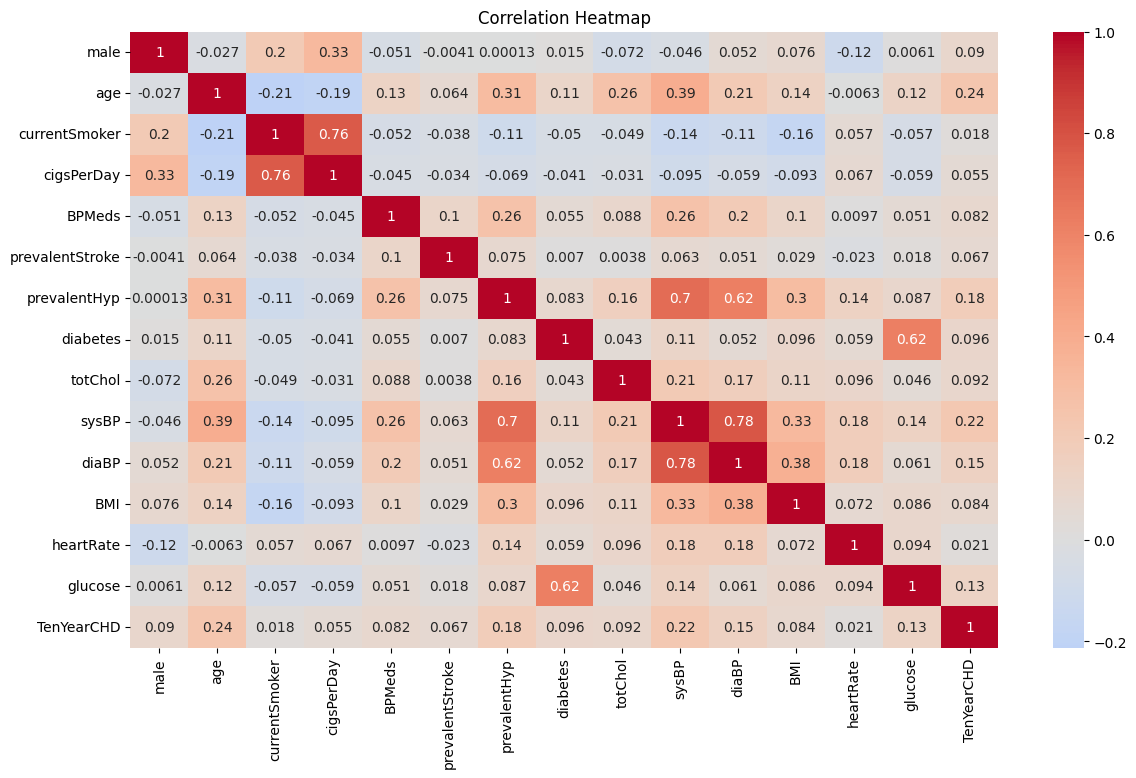

In [25]:
# 열지도로 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
#다중 공산성 상관관계가 0.6이 넘는 행 set
# cigsPerDay - currentSmoker (하루 평균 흡연량 - 현재 흡연 여부)
# sysBP - diaBP - prevalentHyp (수축기 혈압 - 이완기 혈압 - 고혈압 유병 여부)
# glucose - diabetes (혈당 수치 - 당뇨 여부)


# 하루평균 흡연량,  수축기 혈압, 혈당 수치를 선택, 이외의 열 제거
df_cleaned2 = df_cleaned.drop(columns=['currentSmoker','diaBP','prevalentHyp','diabetes'])

In [27]:
# 데이터 전처리 이후 데이터 크기 확인
df_cleaned2.shape

(3850, 11)

In [28]:
# 로지스틱 회귀를 통한 심근 경색 10년 발병 위험 여부 예측
# 심근 경색 10년 발병 위험 열을 제거후 y로 분리
# 분리후 데이터 확인
from sklearn.model_selection import train_test_split
X = df_cleaned2.drop(columns=["TenYearCHD"])
y=df_cleaned2.TenYearCHD
X

,male,age,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose
0,1,39,0.0,0.0,0,195.0,106.0,26.97,80.0,77.0
1,0,46,0.0,0.0,0,250.0,121.0,28.73,95.0,76.0
2,1,48,20.0,0.0,0,245.0,127.5,25.34,75.0,70.0
3,0,61,30.0,0.0,0,225.0,150.0,28.58,65.0,103.0
4,0,46,23.0,0.0,0,285.0,130.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4232,1,68,0.0,0.0,0,176.0,168.0,23.14,60.0,79.0
4233,1,50,1.0,0.0,0,313.0,179.0,25.97,66.0,86.0
4234,1,51,43.0,0.0,0,207.0,126.5,19.71,65.0,68.0
4235,0,48,20.0,0.0,0,248.0,131.0,22.00,84.0,86.0


In [29]:
# 훈련 집합, 테스트 집합 8:2 비율 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# 각 변수들의 scale이 예측에 줄 영향을 줄이기 위해 Scaling
# 데이터를 평균을 0, 표준편차를 1로 변환하여 표준화된 데이터를 생성
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# 로지스틱 회귀 피팅
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

In [32]:

# 파라미터 설정을 안해서 모델의 기본 임계값은 0.5
# 0.5가 넘는다면 1 아니라면 0
y_pred = logreg.predict(X_test_scaled)

np.set_printoptions(threshold=np.inf)
y_pred2 = logreg.predict_proba(X_test_scaled)
print(y_pred2)

np.set_printoptions(threshold=10000)

[[0.80718883 0.19281117]
 [0.96721056 0.03278944]
 [0.98081547 0.01918453]
 [0.84995293 0.15004707]
 [0.80831369 0.19168631]
 [0.93984173 0.06015827]
 [0.94009458 0.05990542]
 [0.88604913 0.11395087]
 [0.66487358 0.33512642]
 [0.93750175 0.06249825]
 [0.74766793 0.25233207]
 [0.82442178 0.17557822]
 [0.77239559 0.22760441]
 [0.79515013 0.20484987]
 [0.84214012 0.15785988]
 [0.84866901 0.15133099]
 [0.90288957 0.09711043]
 [0.89343119 0.10656881]
 [0.75828015 0.24171985]
 [0.90638942 0.09361058]
 [0.90267995 0.09732005]
 [0.70630869 0.29369131]
 [0.72344593 0.27655407]
 [0.81940229 0.18059771]
 [0.73273884 0.26726116]
 [0.97345501 0.02654499]
 [0.90662628 0.09337372]
 [0.89764544 0.10235456]
 [0.85651411 0.14348589]
 [0.64145241 0.35854759]
 [0.76207873 0.23792127]
 [0.95165901 0.04834099]
 [0.9238021  0.0761979 ]
 [0.94666151 0.05333849]
 [0.90174336 0.09825664]
 [0.9833829  0.0166171 ]
 [0.90548132 0.09451868]
 [0.8869102  0.1130898 ]
 [0.91164979 0.08835021]
 [0.94240715 0.05759285]


In [33]:
# 임계값에 따라 결과 예측
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [34]:
# 예측 후 예측 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8337662337662337


In [35]:
# prcision = TP / TP + FP  (모델이 True라고 분류한 것 중에서 실제 True인 것의 비율)
# (TP = 실제 True인 정답을 True 로 예측 )
# (FP = 실제 False인 정답을 True로 예측 )
# 예시 : 병에 걸렸고 병에 걸렸다고 말할 확률 / 병에 안걸렸는데 병에 걸렸다고 할 확률 + 병에 걸렸고 병에 걸렸다고 말할 확률

# Recall = TP / TP + FN (실제 True인 것 중에서 모델이 True라고 예측한 것의 비율)
# (TP = 실제 True인 정답을 True 로 예측 )
# (FN = 실제 True인 정답을 False 로 예측 )
# 예시 : 병에 걸렸고 병에 걸렸다고 말할 확률 / 병에 걸렸는데 병에 안걸렸다고 말할 확률 + 병에 걸렸고 병에 걸렸다고 말할 확률

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

print(classification_report(y_test,y_pred))

# 이러한 검진같은 경우 recall이 중요한 지표
# 병에 걸렸는데 안걸렸다고 말하면 대형 사고 (1 일때의 recall)
# 0 안걸림 1 걸림

# 병이 안걸리는 것에 대해 재현률이 0.98로 높음
# 가장 중요한 지표인 1 일때의 재현률이 0.07로 작음.
# 1에 대해 0.5와 비슷한데 그냥 찍었을때 맞출 확률이 0.5인것을 감안하면 유의한 모델이 아니다.

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       643
           1       0.47      0.07      0.12       127

    accuracy                           0.83       770
   macro avg       0.66      0.53      0.52       770
weighted avg       0.78      0.83      0.78       770



In [36]:

from statsmodels.api import Logit
from statsmodels.tools import add_constant

X_train_scaled = add_constant(X_train_scaled)
X_test_scaled = add_constant(X_test_scaled)

logit_model = Logit(y_train, X_train_scaled)
result = logit_model.fit()

print(result.summary())



Optimization terminated successfully.
         Current function value: 0.371427
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3080
Model:                          Logit   Df Residuals:                     3069
Method:                           MLE   Df Model:                           10
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.1271
Time:                        08:59:40   Log-Likelihood:                -1144.0
converged:                       True   LL-Null:                       -1310.6
Covariance Type:            nonrobust   LLR p-value:                 1.473e-65
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0153      0.063    -31.968      0.000      -2.139      -1.892
x1             0.2856      0.

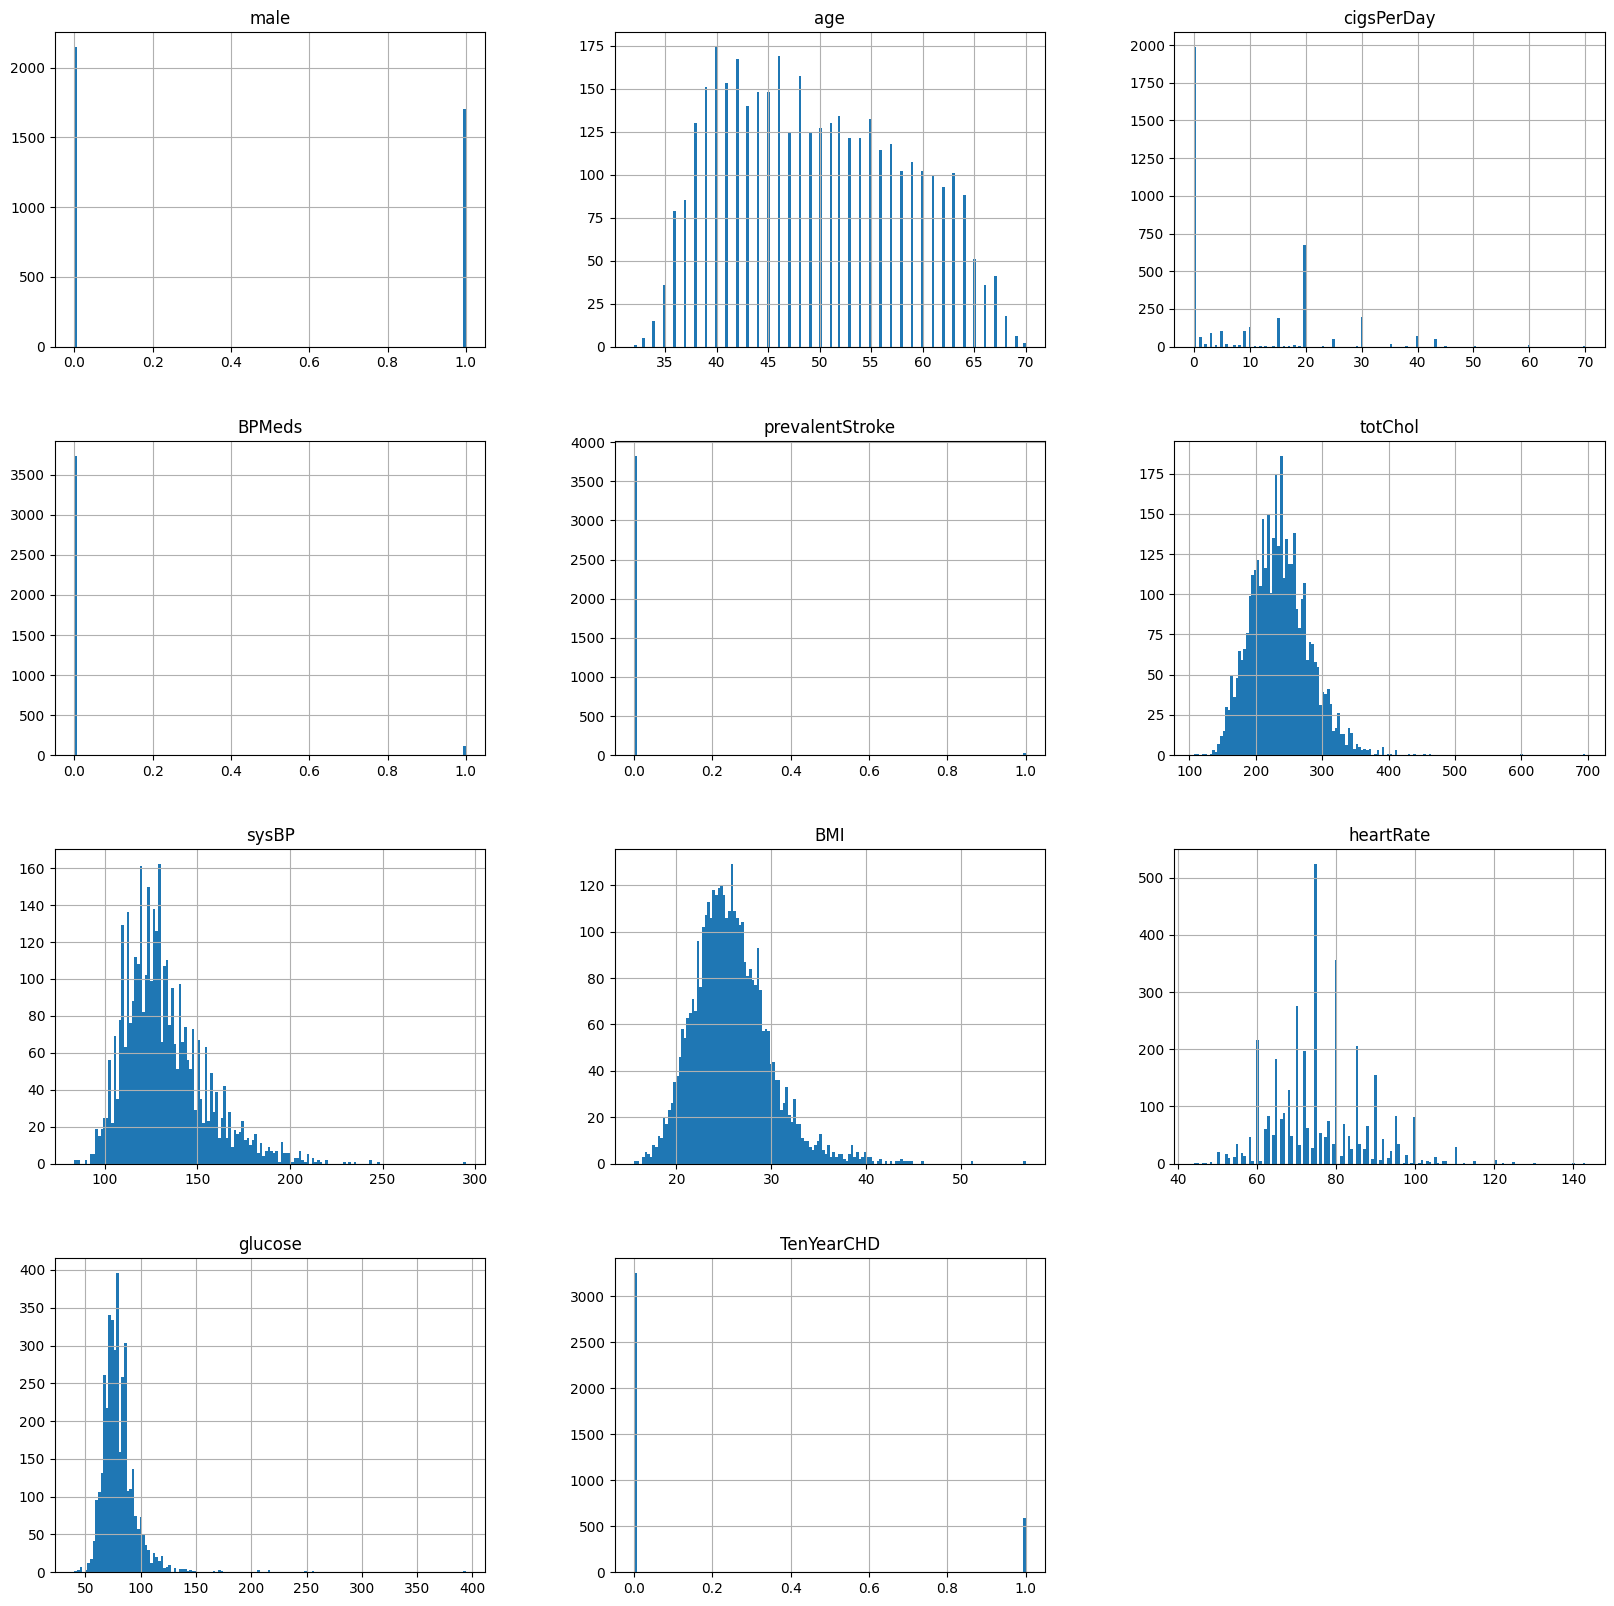

In [37]:
# 각 열에 대한 도수 분포표를 보고 이상치 제거하자.
df_cleaned2.hist(figsize=(20,20),bins = 150)

df_cleaned2 = df_cleaned2[df_cleaned2['totChol'] <= 400]
df_cleaned2 = df_cleaned2[df_cleaned2['sysBP'] <= 220]
df_cleaned2 = df_cleaned2[df_cleaned2['BMI'] <= 40]
df_cleaned2 = df_cleaned2[df_cleaned2['heartRate'] <= 120]
df_cleaned2 = df_cleaned2[df_cleaned2['glucose'] <= 150]


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'cigsPerDay'}>],
       [<Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'totChol'}>],
       [<Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>],
       [<Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>, <Axes: >]], dtype=object)

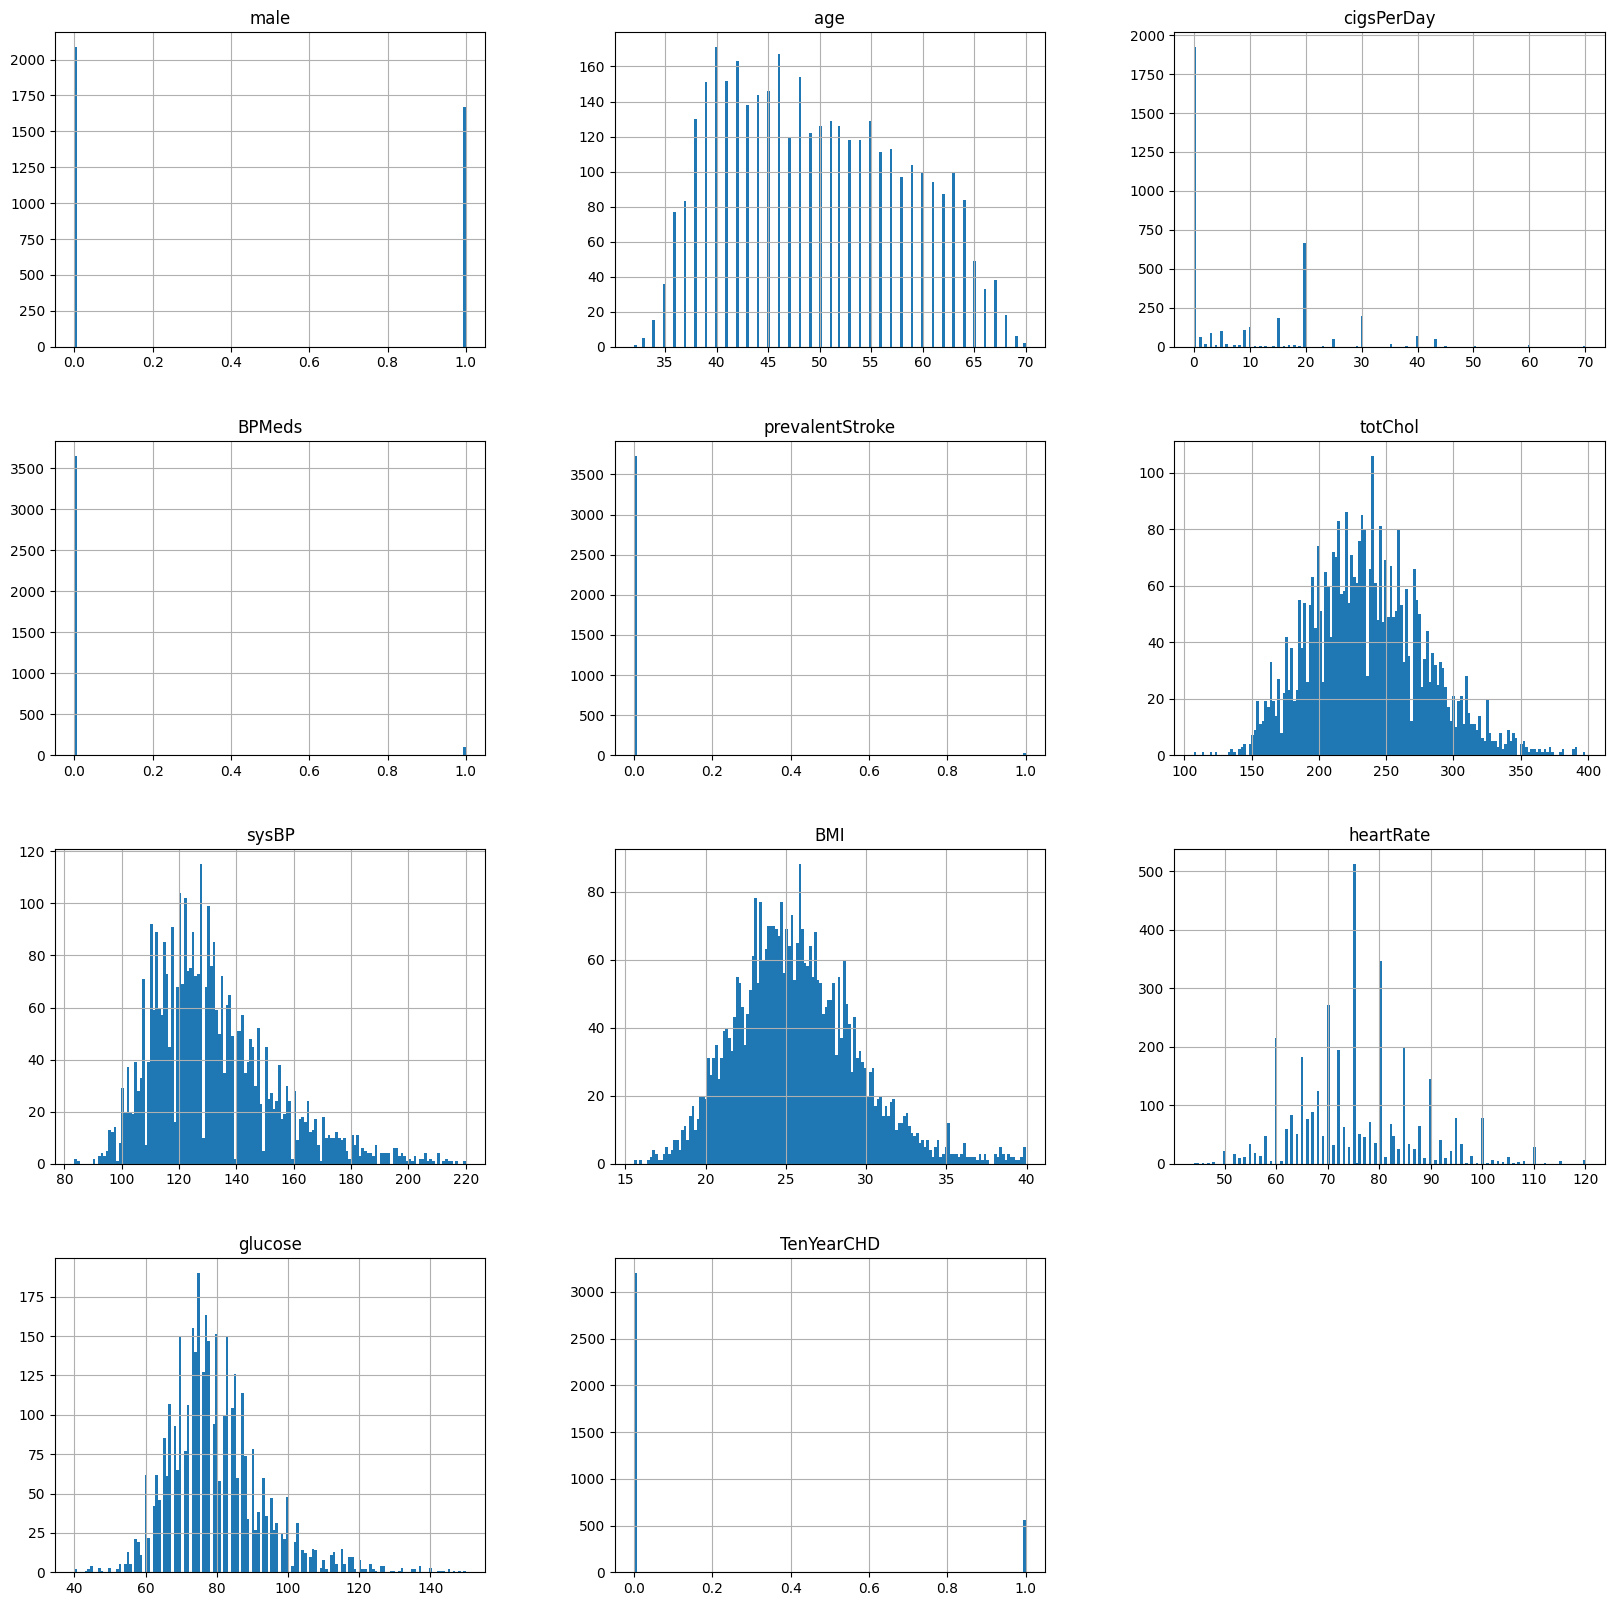

In [38]:
df_cleaned2.hist(figsize=(20,20), bins = 150)

In [39]:
# 과정 반복

# 데이터 전처리 이후 데이터 크기 확인
df_cleaned2.shape


(3755, 11)

In [95]:
# 로지스틱 회귀를 통한 심근 경색 10년 발병 위험 여부 예측
# 심근 경색 10년 발병 위험 열을 제거후 y로 분리
# 분리후 데이터 확인
from sklearn.model_selection import train_test_split
X = df_cleaned2.drop(columns=["TenYearCHD"])
y=df_cleaned2.TenYearCHD
X

,male,age,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose
0,1,39,0.0,0.0,0,195.0,106.0,26.97,80.0,77.0
1,0,46,0.0,0.0,0,250.0,121.0,28.73,95.0,76.0
2,1,48,20.0,0.0,0,245.0,127.5,25.34,75.0,70.0
3,0,61,30.0,0.0,0,225.0,150.0,28.58,65.0,103.0
4,0,46,23.0,0.0,0,285.0,130.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4232,1,68,0.0,0.0,0,176.0,168.0,23.14,60.0,79.0
4233,1,50,1.0,0.0,0,313.0,179.0,25.97,66.0,86.0
4234,1,51,43.0,0.0,0,207.0,126.5,19.71,65.0,68.0
4235,0,48,20.0,0.0,0,248.0,131.0,22.00,84.0,86.0


In [96]:

# 훈련 집합, 테스트 집합 8:2 비율 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
# 각 변수들의 scale이 예측에 줄 영향을 줄이기 위해 Scaling
# 데이터를 평균을 0, 표준편차를 1로 변환하여 표준화된 데이터를 생성
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [98]:
# 로지스틱 회귀 피팅
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

In [99]:
# 파라미터 설정을 안해서 모델의 기본 임계값은 0.5
# 0.5가 넘는다면 1 아니라면 0
y_pred = logreg.predict(X_test_scaled)

np.set_printoptions(threshold=np.inf)
y_pred2 = logreg.predict_proba(X_test_scaled)
print(y_pred2)

np.set_printoptions(threshold=10000)


[[0.88452245 0.11547755]
 [0.87197717 0.12802283]
 [0.89182675 0.10817325]
 [0.86894622 0.13105378]
 [0.85262538 0.14737462]
 [0.9682357  0.0317643 ]
 [0.90521951 0.09478049]
 [0.88753445 0.11246555]
 [0.90099684 0.09900316]
 [0.97973289 0.02026711]
 [0.95212484 0.04787516]
 [0.95527998 0.04472002]
 [0.96833377 0.03166623]
 [0.96699692 0.03300308]
 [0.86238961 0.13761039]
 [0.87892881 0.12107119]
 [0.74618052 0.25381948]
 [0.69615027 0.30384973]
 [0.81540269 0.18459731]
 [0.95463158 0.04536842]
 [0.65118489 0.34881511]
 [0.90338734 0.09661266]
 [0.68741102 0.31258898]
 [0.79691648 0.20308352]
 [0.82361546 0.17638454]
 [0.8552356  0.1447644 ]
 [0.6300564  0.3699436 ]
 [0.72657107 0.27342893]
 [0.86657412 0.13342588]
 [0.87275766 0.12724234]
 [0.91955805 0.08044195]
 [0.91297088 0.08702912]
 [0.9720173  0.0279827 ]
 [0.81131713 0.18868287]
 [0.86585319 0.13414681]
 [0.95802102 0.04197898]
 [0.91407469 0.08592531]
 [0.86446885 0.13553115]
 [0.91373055 0.08626945]
 [0.81163021 0.18836979]


In [100]:
# 임계값에 따라 결과 예측
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [101]:
# 예측 후 예측 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8521970705725699


In [102]:
# prcision = TP / TP + FP  (모델이 True라고 분류한 것 중에서 실제 True인 것의 비율)
# (TP = 실제 True인 정답을 True 로 예측 )
# (FP = 실제 False인 정답을 True로 예측 )
# 예시 : 병에 걸렸고 병에 걸렸다고 말할 확률 / 병에 안걸렸는데 병에 걸렸다고 할 확률 + 병에 걸렸고 병에 걸렸다고 말할 확률

# Recall = TP / TP + FN (실제 True인 것 중에서 모델이 True라고 예측한 것의 비율)
# (TP = 실제 True인 정답을 True 로 예측 )
# (FN = 실제 True인 정답을 False 로 예측 )
# 예시 : 병에 걸렸고 병에 걸렸다고 말할 확률 / 병에 걸렸는데 병에 안걸렸다고 말할 확률 + 병에 걸렸고 병에 걸렸다고 말할 확률

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

print(classification_report(y_test,y_pred))


# 이러한 검진같은 경우 recall이 중요한 지표
# 병에 걸렸는데 안걸렸다고 말하면 대형 사고 (1 일때의 recall)
# 0 안걸림 1 걸림

# 병이 안걸리는 것에 대해 재현률이 1로 높음
# 가장 중요한 지표인 1 일때의 재현률이 0.09로 작음.
# 1에 대한 precision은  0.77로 향상  그냥 찍었을때 맞출 확률이 0.5인것을 감안하면 예측을 하긴한다.

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       634
           1       0.75      0.08      0.14       117

    accuracy                           0.85       751
   macro avg       0.80      0.54      0.53       751
weighted avg       0.84      0.85      0.80       751



In [103]:
from statsmodels.api import Logit
from statsmodels.tools import add_constant

X_train_scaled = add_constant(X_train_scaled)
X_test_scaled = add_constant(X_test_scaled)

logit_model = Logit(y_train, X_train_scaled)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.369528
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3004
Model:                          Logit   Df Residuals:                     2993
Method:                           MLE   Df Model:                           10
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.1091
Time:                        09:16:25   Log-Likelihood:                -1110.1
converged:                       True   LL-Null:                       -1246.0
Covariance Type:            nonrobust   LLR p-value:                 1.366e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0331      0.063    -32.076      0.000      -2.157      -1.909
x1             0.2513      0.

In [104]:
# 변수 소거법 시행
import warnings
from sklearn.linear_model import LogisticRegression
import sklearn.base
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report

selector = RFECV(estimator=logreg, step=1)
selector = selector.fit(X_train, y_train)

selector.support_


array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False])

In [105]:
# 1일 때 precision 증가
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

logreg.fit(X_train_selected, y_train)
y_pred = logreg.predict(X_test_selected)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       634
           1       0.78      0.06      0.11       117

    accuracy                           0.85       751
   macro avg       0.81      0.53      0.51       751
weighted avg       0.84      0.85      0.79       751



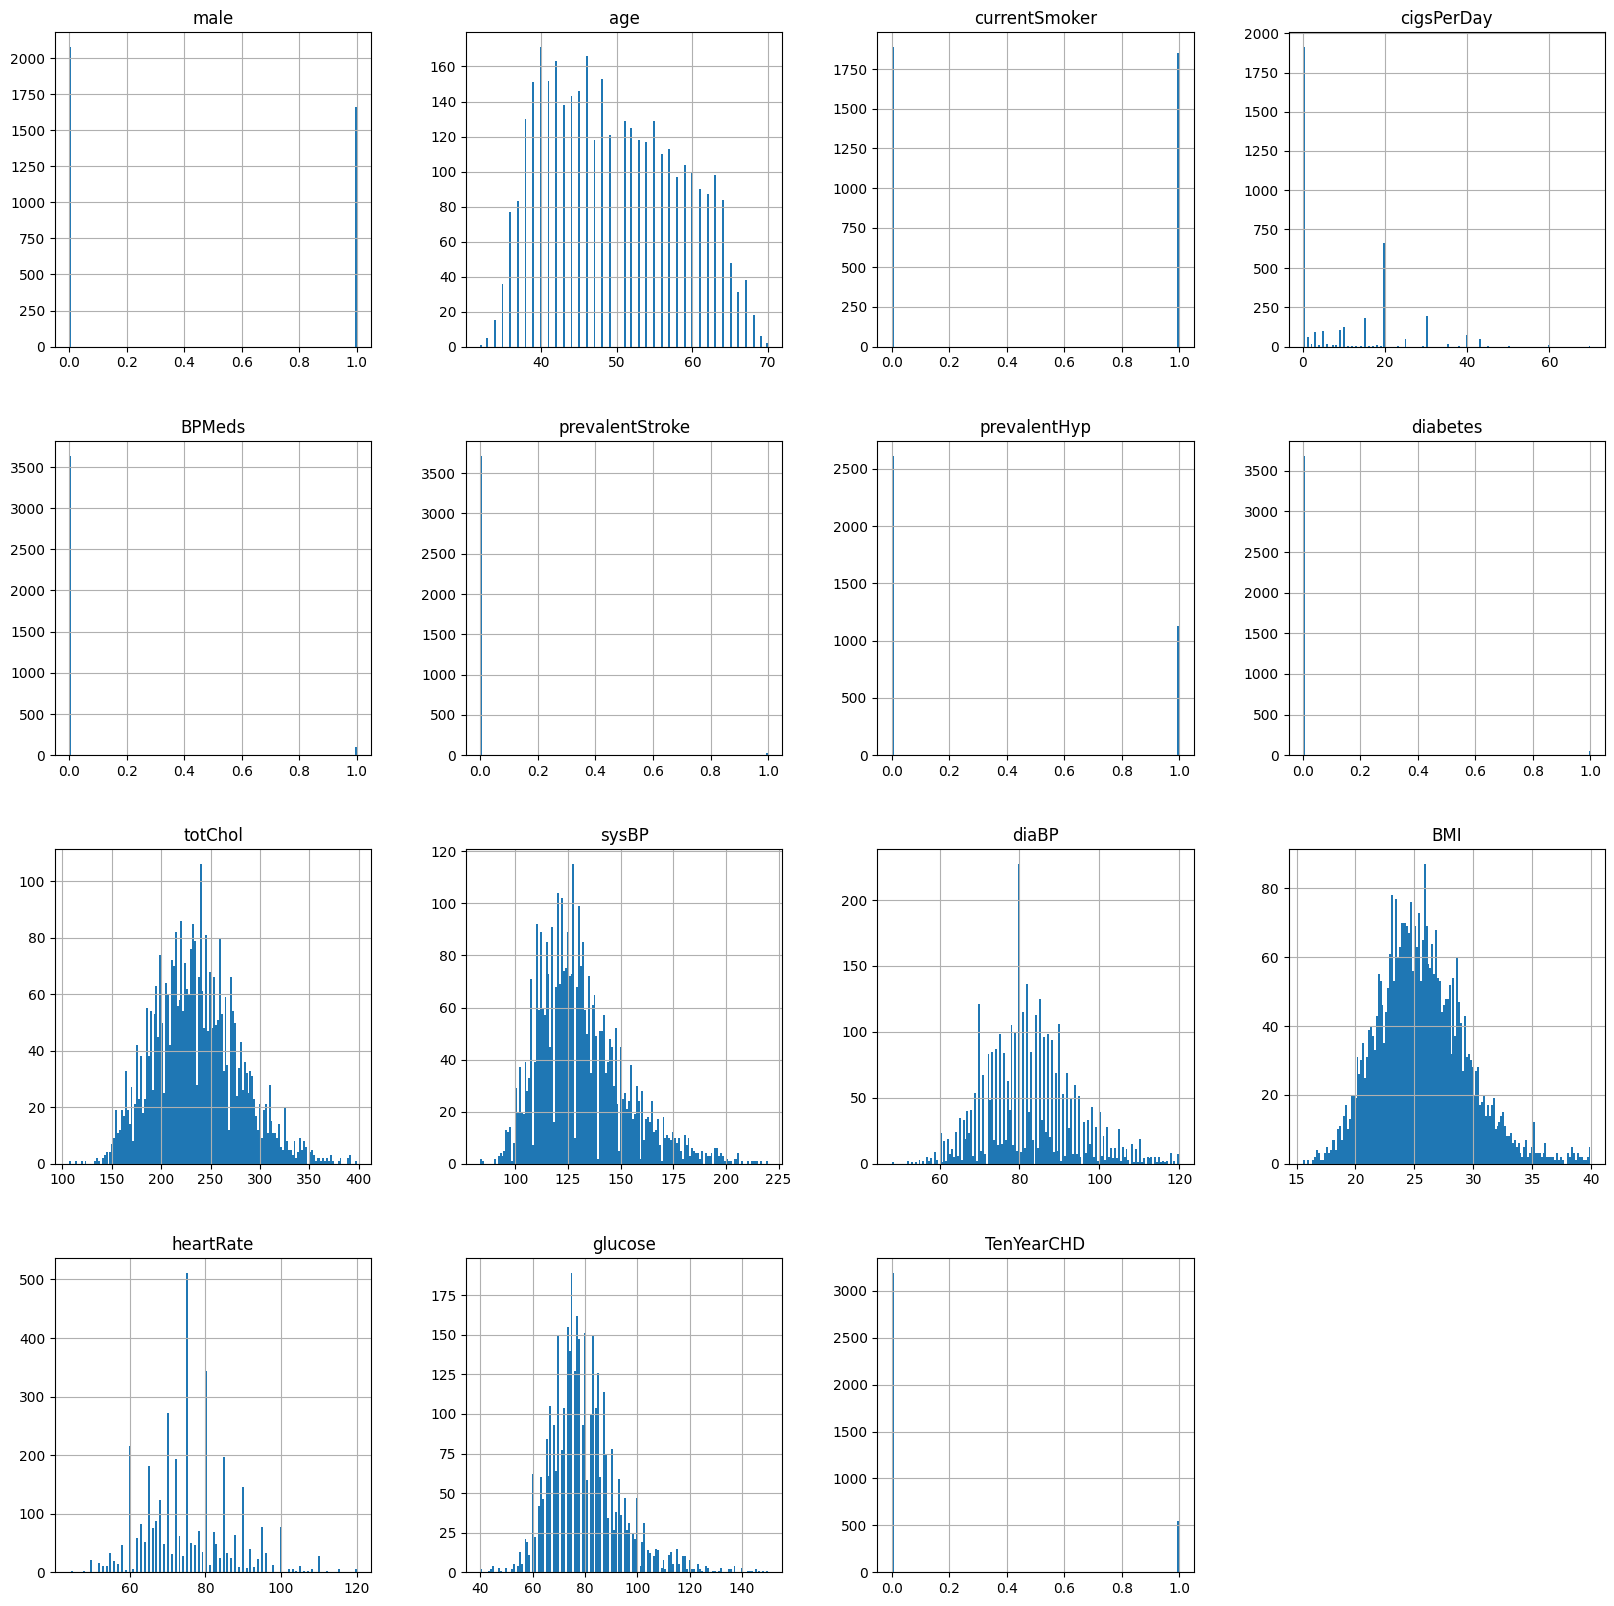

In [106]:
# 다중 공산성 제거 전 특징들을 바탕으로 변수선택 기법 시행

# 각 열에 대한 도수 분포표를 보고 이상치 제거하자.
df_cleaned.hist(figsize=(20,20),bins = 150)

df_cleaned = df_cleaned[df_cleaned['totChol'] <= 400]
df_cleaned = df_cleaned[df_cleaned['sysBP'] <= 220]
df_cleaned = df_cleaned[df_cleaned['diaBP'] <=120]
df_cleaned = df_cleaned[df_cleaned['BMI'] <= 40]
df_cleaned = df_cleaned[df_cleaned['heartRate'] <= 120]
df_cleaned = df_cleaned[df_cleaned['glucose'] <= 150]



In [107]:
# 로지스틱 회귀를 통한 심근 경색 10년 발병 위험 여부 예측
# 심근 경색 10년 발병 위험 열을 제거후 y로 분리
# 분리후 데이터 확인
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns=["TenYearCHD"])
y=df_cleaned.TenYearCHD
X


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0


In [108]:

# 훈련 집합, 테스트 집합 8:2 비율 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:

# 각 변수들의 scale이 예측에 줄 영향을 줄이기 위해 Scaling
# 데이터를 평균을 0, 표준편차를 1로 변환하여 표준화된 데이터를 생성
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [110]:

# 로지스틱 회귀 피팅
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)



LogisticRegression()

In [111]:
# 파라미터 선택하기
import warnings
from sklearn.linear_model import LogisticRegression
import sklearn.base
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report

selector = RFECV(estimator=logreg, step=1)
selector = selector.fit(X_train, y_train)

selector.support_


array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True])

In [112]:
# 다중 공산성을 제거하기 전보다 확연히 낮아짐
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

logreg.fit(X_train_selected, y_train)

y_pred = logreg.predict(X_test_selected)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.99      0.91       629
           1       0.38      0.03      0.05       119

    accuracy                           0.84       748
   macro avg       0.61      0.51      0.48       748
weighted avg       0.77      0.84      0.77       748

